In [1]:
import pandas as pd
import datetime as dt
import seaborn as sns
import numpy as np

In [2]:
ques_act_ampm = pd.read_csv('../../datas/ques_act_merge/ques_act_ampm.csv')
ques_act_day = pd.read_csv('../../datas/ques_act_merge/ques_act_day.csv')
att_weather = pd.read_csv('../../datas/attribute_weater.csv')

In [3]:
ques_act_day.columns

Index(['Unnamed: 0', 'user_id', 'value_dams', 'datetime_jp', 'Date_jp',
       'hour_x', 'positive_score', 'depressive_score', 'anxious_score',
       'datetime_jp_before3', 'datetime_jp_before6', 'datetime_jp_before9',
       'datetime_jp_before12', 'datetime_jp_before24', 'meeting_ftof', 'Date',
       'activity_type_id', 'hour_y', 'am_pm', 'meal', 'working_alone',
       'hobby_break', 'housework_childcare', 'break', 'transfer',
       'web_conference', 'other', 'work_outsideduty', 'facetoface_meeting',
       'collaboration', 'remote_conference', 'Days_plus1'],
      dtype='object')

In [4]:
ques_act_day_corr = ques_act_day[['positive_score', 'depressive_score', 'anxious_score',
       'meeting_ftof', 'meal', 'working_alone',
       'hobby_break', 'housework_childcare', 'break', 'transfer',
       'web_conference', 'other', 'work_outsideduty', 'facetoface_meeting',
       'collaboration', 'remote_conference']]

In [5]:
ques_act_day_corr

,positive_score,depressive_score,anxious_score,meeting_ftof,meal,working_alone,hobby_break,housework_childcare,break,transfer,web_conference,other,work_outsideduty,facetoface_meeting,collaboration,remote_conference
0,5.666667,0.666667,1.0,0,0.044983,0.000000,0.000000,0.00,0.0,30.000000,0.0,71.223333,0.000000,0.0,0.000000,0.0
1,3.666667,3.000000,2.0,0,6.866667,0.000000,45.633333,3.25,0.0,0.000000,0.0,0.000000,0.017717,0.0,0.000000,0.0
2,2.333333,0.000000,1.0,0,0.010333,0.000000,0.000000,0.00,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0
3,0.333333,0.000000,4.0,0,7.967950,0.000000,0.000000,0.00,0.0,86.880667,0.0,47.286383,0.000000,0.0,0.000000,0.0
4,4.000000,3.000000,3.0,0,57.242667,0.000000,0.000000,0.00,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,6.666667,2.000000,3.0,0,0.000000,163.749867,0.000000,0.00,30.0,135.000000,0.0,0.000000,0.000000,0.0,40.026833,0.0
1135,6.666667,2.000000,3.0,0,22.000000,531.000000,0.000000,80.00,50.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,10.0
1136,3.000000,0.333333,2.0,0,25.000000,261.000000,187.987483,0.00,45.4,182.853700,211.2,0.000000,0.000000,0.0,0.000000,0.0
1137,5.000000,0.000000,0.0,0,30.000000,400.063700,0.000000,0.00,0.0,0.000000,60.0,0.000000,0.000000,0.0,0.000000,0.0


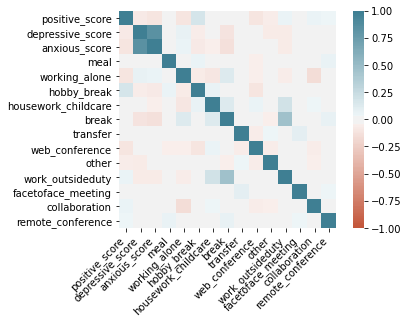

In [6]:
corr = ques_act_day_corr.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [7]:
att_weather = att_weather[['user_id', 'sex', 'age', 'locate_id',
       'locate_name', 'Date', 'ave_temperature', 'max_temperature',
       'mini_temperature', 'sum_rainfall', 'sunlight_time', 'ave_windspeed',
       'max_windspeed', 'ave_vaporpressure', 'ave_cloudcover', 'weather_6to18',
       'weather_18to6', 'locate']]

In [8]:
att_weather['weather_6to18'].unique()

array(['曇', 'みぞれ時々曇一時晴後雨', '晴', '曇一時晴', '曇時々晴', '晴後一時曇', '雨一時曇', '雨後時々曇',
       '晴時々曇', '雨時々曇', '曇一時晴後雨、みぞれを伴う', '曇後時々晴', 'みぞれ時々雨後曇', '晴一時曇',
       '曇後雨時々晴', 'みぞれ時々晴一時雪後曇', '雨', '曇時々晴一時雨', '雨時々曇、みぞれを伴う',
       '曇一時雨後晴、みぞれを伴う', '雨時々曇後晴', '曇後時々晴一時雨', '雪時々曇後晴', '晴後曇一時雨', '曇後時々雨',
       '雪時々曇、みぞれを伴う', '曇後晴一時雪、みぞれを伴う', '晴一時雪、みぞれを伴う', '薄曇', '快晴',
       '曇後晴一時雨', '曇後一時晴', '晴後一時薄曇', '薄曇一時晴', '晴後雪', '雨後曇', '晴一時薄曇',
       '曇時々雨', '雨後一時曇', '曇後晴', '曇一時雪', '曇一時雪後一時晴', '雪時々みぞれ後曇一時晴',
       '曇一時雪後晴', '晴後曇一時雨、みぞれを伴う', '晴時々曇、みぞれを伴う', '曇時々晴後雨', '晴時々曇一時雪',
       '晴後時々曇', 'みぞれ時々雪後曇一時雨', '雪時々晴後曇、みぞれを伴う', '曇時々雨一時晴',
       '晴一時雪後曇、みぞれを伴う', '晴時々雨一時曇', '雪後みぞれ時々曇一時雨', '雨時々曇一時晴、雷を伴う',
       '曇一時雪後晴、みぞれを伴う', '曇一時雨後時々晴', '晴後曇一時雪', '雨時々みぞれ一時曇', '雪時々曇',
       '曇時々雪一時晴', '曇後時々雨、みぞれを伴う', '雨時々晴後曇', '曇時々晴後雪、みぞれを伴う', '雪', '雪後一時曇',
       '晴時々曇一時雨', '雨後晴', '曇一時雨', '雪後晴', '雪時々曇一時晴', '雪一時晴', '曇後雨一時みぞれ',
       '曇時々雪一時みぞれ', '晴後時々薄曇', '薄曇後一時雨', '薄曇時々晴', '曇一時雪、みぞれを伴う', '曇一時雨後晴',
       '曇時々雪一時晴、みぞれを伴う', '曇一時雪後雨、雷を伴う

In [9]:
att_weather.loc[att_weather['weather_6to18'].str.contains('晴',na=False),'weather_6to18']=2
att_weather.loc[att_weather['weather_6to18'].str.contains('雪',na=False),'weather_6to18']=0
att_weather.loc[att_weather['weather_6to18'].str.contains('雨',na=False),'weather_6to18']=0
att_weather.loc[att_weather['weather_6to18'].str.contains('曇',na=False),'weather_6to18']=1

att_weather.loc[att_weather['weather_18to6'].str.contains('晴',na=False),'weather_18to6']=2
att_weather.loc[att_weather['weather_18to6'].str.contains('雪',na=False),'weather_18to6']=0
att_weather.loc[att_weather['weather_18to6'].str.contains('雨',na=False),'weather_18to6']=0
att_weather.loc[att_weather['weather_18to6'].str.contains('曇',na=False),'weather_18to6']=1

In [10]:
dams_score = ques_act_day[['user_id','Date_jp','positive_score','depressive_score','anxious_score']]
att_weather['Date'] = pd.to_datetime(att_weather['Date'])
dams_score['Date_jp'] = pd.to_datetime(dams_score['Date_jp'])
dams_att_weather = pd.merge(dams_score,att_weather,left_on=['user_id','Date_jp'],right_on=['user_id','Date'],how='inner')

<ipython-input-10-754002e7b86a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dams_score['Date_jp'] = pd.to_datetime(dams_score['Date_jp'])


In [11]:
dams_att_weather.columns

Index(['user_id', 'Date_jp', 'positive_score', 'depressive_score',
       'anxious_score', 'sex', 'age', 'locate_id', 'locate_name', 'Date',
       'ave_temperature', 'max_temperature', 'mini_temperature',
       'sum_rainfall', 'sunlight_time', 'ave_windspeed', 'max_windspeed',
       'ave_vaporpressure', 'ave_cloudcover', 'weather_6to18', 'weather_18to6',
       'locate'],
      dtype='object')

In [12]:
dams_att_weather_corr = dams_att_weather[['positive_score', 'depressive_score',
       'anxious_score', 'sex', 'age', 
       'ave_temperature', 'max_temperature', 'mini_temperature',
       'sum_rainfall', 'sunlight_time', 'ave_windspeed', 'max_windspeed',
       'ave_vaporpressure', 'weather_6to18', 'weather_18to6']]

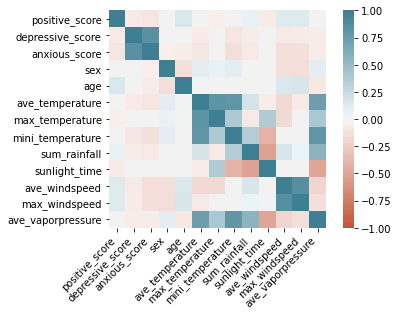

In [13]:
corr = dams_att_weather_corr.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [14]:
ques_act_day_corr

,positive_score,depressive_score,anxious_score,meeting_ftof,meal,working_alone,hobby_break,housework_childcare,break,transfer,web_conference,other,work_outsideduty,facetoface_meeting,collaboration,remote_conference
0,5.666667,0.666667,1.0,0,0.044983,0.000000,0.000000,0.00,0.0,30.000000,0.0,71.223333,0.000000,0.0,0.000000,0.0
1,3.666667,3.000000,2.0,0,6.866667,0.000000,45.633333,3.25,0.0,0.000000,0.0,0.000000,0.017717,0.0,0.000000,0.0
2,2.333333,0.000000,1.0,0,0.010333,0.000000,0.000000,0.00,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0
3,0.333333,0.000000,4.0,0,7.967950,0.000000,0.000000,0.00,0.0,86.880667,0.0,47.286383,0.000000,0.0,0.000000,0.0
4,4.000000,3.000000,3.0,0,57.242667,0.000000,0.000000,0.00,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,6.666667,2.000000,3.0,0,0.000000,163.749867,0.000000,0.00,30.0,135.000000,0.0,0.000000,0.000000,0.0,40.026833,0.0
1135,6.666667,2.000000,3.0,0,22.000000,531.000000,0.000000,80.00,50.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,10.0
1136,3.000000,0.333333,2.0,0,25.000000,261.000000,187.987483,0.00,45.4,182.853700,211.2,0.000000,0.000000,0.0,0.000000,0.0
1137,5.000000,0.000000,0.0,0,30.000000,400.063700,0.000000,0.00,0.0,0.000000,60.0,0.000000,0.000000,0.0,0.000000,0.0


[Text(0.5, 0, 'Score'), Text(0, 0.5, 'Number of data')]

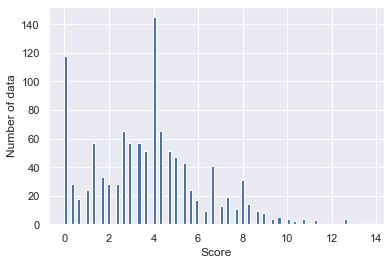

In [73]:
ques_act_day_corr['positive_score'].hist(bins=100).set(xlabel="Score", ylabel="Number of data")

In [16]:
ques_act_day_corr['anxious_score'].quantile([0, 0.3, 0.5, 0.7, 1.0])

0.0     0.000000
0.3     0.666667
0.5     2.000000
0.7     3.333333
1.0    17.333333
Name: anxious_score, dtype: float64

In [17]:
ques_act_day_corr.loc[ques_act_day_corr['positive_score']<=2.666667,'positive_class']=0
ques_act_day_corr.loc[(ques_act_day_corr['positive_score']>2.666667)&(ques_act_day_corr['positive_score']<4.66667),'positive_class']=1
ques_act_day_corr.loc[ques_act_day_corr['positive_score']>=4.66667,'positive_class']=2

/Users/yusuke-n/Library/Python/3.8/lib/python/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/yusuke-n/Library/Python/3.8/lib/python/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/Users/yusuke-n/Library/Python/3.8/lib/python/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [18]:
ques_act_day_corr

,positive_score,depressive_score,anxious_score,meeting_ftof,meal,working_alone,hobby_break,housework_childcare,break,transfer,web_conference,other,work_outsideduty,facetoface_meeting,collaboration,remote_conference,positive_class
0,5.666667,0.666667,1.0,0,0.044983,0.000000,0.000000,0.00,0.0,30.000000,0.0,71.223333,0.000000,0.0,0.000000,0.0,2.0
1,3.666667,3.000000,2.0,0,6.866667,0.000000,45.633333,3.25,0.0,0.000000,0.0,0.000000,0.017717,0.0,0.000000,0.0,1.0
2,2.333333,0.000000,1.0,0,0.010333,0.000000,0.000000,0.00,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
3,0.333333,0.000000,4.0,0,7.967950,0.000000,0.000000,0.00,0.0,86.880667,0.0,47.286383,0.000000,0.0,0.000000,0.0,0.0
4,4.000000,3.000000,3.0,0,57.242667,0.000000,0.000000,0.00,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,6.666667,2.000000,3.0,0,0.000000,163.749867,0.000000,0.00,30.0,135.000000,0.0,0.000000,0.000000,0.0,40.026833,0.0,2.0
1135,6.666667,2.000000,3.0,0,22.000000,531.000000,0.000000,80.00,50.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,10.0,2.0
1136,3.000000,0.333333,2.0,0,25.000000,261.000000,187.987483,0.00,45.4,182.853700,211.2,0.000000,0.000000,0.0,0.000000,0.0,1.0
1137,5.000000,0.000000,0.0,0,30.000000,400.063700,0.000000,0.00,0.0,0.000000,60.0,0.000000,0.000000,0.0,0.000000,0.0,2.0


In [22]:
merged_fitbit = pd.read_csv('../../datas/fitbit_preprocessed_data/agg_for_day/merged_fitbit.csv')
sleep = pd.read_csv('../../datas/fitbit_preprocessed_data/agg_for_day/sleep_day.csv')

In [23]:
dams_score = ques_act_day[['user_id', 'value_dams', 'datetime_jp', 'Date_jp',
        'positive_score', 'depressive_score', 'anxious_score', 'Days_plus1']]
dams_score.loc[dams_score['positive_score']<=2.666667,'positive_class']=0
dams_score.loc[(dams_score['positive_score']>2.666667)&(dams_score['positive_score']<4.66667),'positive_class']=1
dams_score.loc[dams_score['positive_score']>=4.66667,'positive_class']=2

dams_score.loc[dams_score['depressive_score']<=0.333333,'depressive_class']=0
dams_score.loc[(dams_score['depressive_score']>0.333333)&(dams_score['depressive_score']<2.666667),'depressive_class']=1
dams_score.loc[dams_score['depressive_score']>=2.666667,'depressive_class']=2

dams_score.loc[dams_score['anxious_score']<=0.666667,'anxious_class']=0
dams_score.loc[(dams_score['anxious_score']>0.666667)&(dams_score['anxious_score']<3.333333),'anxious_class']=1
dams_score.loc[dams_score['anxious_score']>=3.333333,'anxious_class']=2

/Users/yusuke-n/Library/Python/3.8/lib/python/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/yusuke-n/Library/Python/3.8/lib/python/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/Users/yusuke-n/Library/Python/3.8/lib/python/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [24]:
ques_fitbit = pd.merge(dams_score, merged_fitbit,left_on=['user_id','Date_jp'],right_on=['user_id','date_plus1'])
ques_fitbit = pd.merge(ques_fitbit, sleep,left_on=['user_id','Date_jp'],right_on=['user_id','date'])

In [25]:
merged_fitbit['Dayminus1'] = pd.to_datetime(merged_fitbit['date'])-dt.timedelta(days=1)

In [26]:
ques_fitbit.columns
ques_fitbit_corr = ques_fitbit[[ 'positive_score',
       'depressive_score', 'anxious_score', 
       'floor_mean', 'floor_median', 'floor_var', 'step_mean', 'step_median',
       'step_var', 'mets_mean', 'calory_mean', 'mets_median', 'calory_median',
       'mets_var', 'calory_var', 'heart_mean', 'heart_median', 'heart_var',
       'minutesFairlyActive_mean', 'minutesFairlyActive_median',
       'minutesFairlyActive_var', 'minutesLightlyActive_mean',
       'minutesLightlyActive_median', 'minutesLightlyActive_var',
       'minutesSedentary_mean', 'minutesSedentary_median',
       'minutesSedentary_var', 'minutesVeryActive_mean',
       'minutesVeryActive_median', 'minutesVeryActive_var','sleep_mean_y', 'sleep_median_y',
       'sleep_var_y']]

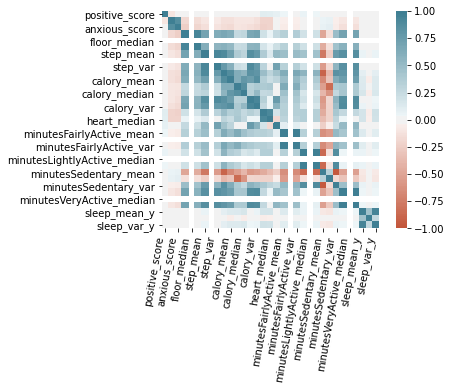

In [27]:
corr = ques_fitbit_corr.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=80,
    horizontalalignment='right'
);

In [28]:
import pandas as pd # 基本ライブラリ
import numpy as np # 基本ライブラリ
import matplotlib.pyplot as plt # グラフ描画用
import seaborn as sns; sns.set() # グラフ描画用
import warnings # 実行に関係ない警告を無視
import lightgbm as lgb #LightGBM
from sklearn import datasets
from sklearn.model_selection import train_test_split # データセット分割用
from sklearn.metrics import accuracy_score # モデル評価用(正答率)
from sklearn.metrics import log_loss # モデル評価用(logloss)     
from sklearn.metrics import roc_auc_score # モデル評価用(auc)
from sklearn.metrics import confusion_matrix


In [29]:
# 説明変数,目的変数
y = ques_fitbit['positive_class'].values# 説明変数(target以外の特徴量)
X = ques_fitbit[[
       'floor_mean', 'floor_median', 'floor_var', 'step_mean', 'step_median',
       'step_var', 'mets_mean', 'calory_mean', 'mets_median', 'calory_median',
       'mets_var', 'calory_var', 'heart_mean', 'heart_median', 'heart_var',
       'minutesFairlyActive_mean', 'minutesFairlyActive_median',
       'minutesFairlyActive_var', 'minutesLightlyActive_mean',
       'minutesLightlyActive_median', 'minutesLightlyActive_var',
       'minutesSedentary_mean', 'minutesSedentary_median',
       'minutesSedentary_var', 'minutesVeryActive_mean',
       'minutesVeryActive_median', 'minutesVeryActive_var','sleep_mean_y', 'sleep_median_y',
       'sleep_var_y']].values # 目的変数(target)

# トレーニングデータ,テストデータの分割
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=2)

In [30]:
# モデルの学習
model = lgb.LGBMClassifier() # モデルのインスタンスの作成
model.fit(X_train, y_train) # モデルの学習

# テストデータの予測クラス (予測クラス(0 or 1 or 2)を返す)
y_pred = model.predict(X_test)
# テストデータのクラス予測確率 (各クラスの予測確率 [クラス0の予測確率,クラス1の予測確率,クラス2の予測確率] を返す)
y_pred_prob = model.predict_proba(X_test)

In [31]:
# 真値と予測値の表示
df_pred = pd.DataFrame({'target':y_test,'target_pred':y_pred})
display(df_pred)

# 真値と予測確率の表示
df_pred_prob = pd.DataFrame({'y':y_test, 'target0_prob':y_pred_prob[:,0], 'target1_prob':y_pred_prob[:,1], 'target2_prob':y_pred_prob[:,2]})
display(df_pred_prob)

,target,target_pred
0,2.0,0.0
1,1.0,2.0
2,1.0,1.0
3,0.0,0.0
4,1.0,0.0
...,...,...
90,2.0,0.0
91,1.0,1.0
92,0.0,1.0
93,1.0,0.0


,y,target0_prob,target1_prob,target2_prob
0,2.0,0.970073,0.015768,0.014159
1,1.0,0.290574,0.068076,0.641349
2,1.0,0.399821,0.521576,0.078603
3,0.0,0.817231,0.163812,0.018957
4,1.0,0.500440,0.425712,0.073848
...,...,...,...,...
90,2.0,0.584617,0.247155,0.168228
91,1.0,0.053922,0.563105,0.382973
92,0.0,0.105931,0.888281,0.005788
93,1.0,0.986934,0.002944,0.010122


<AxesSubplot:>

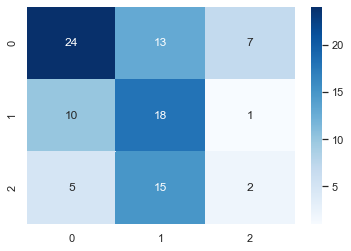

In [32]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues').set(xlabel="predict label", ylabel="true label")

In [33]:
import pandas as pd # 基本ライブラリ
import numpy as np # 基本ライブラリ
import matplotlib.pyplot as plt # グラフ描画用
import seaborn as sns; sns.set() # グラフ描画用
import warnings # 実行に関係ない警告を無視
warnings.filterwarnings('ignore')
import lightgbm as lgb #LightGBM
from sklearn import datasets
from sklearn.model_selection import train_test_split # データセット分割用

In [34]:
import lightgbm as lgb

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002898 seconds.
You can set `force_col_wise=true` to remove the overhead.
[1]	valid_0's multi_logloss: 1.09128
Training until validation scores don't improve for 20 rounds
[2]	valid_0's multi_logloss: 1.0843
[3]	valid_0's multi_logloss: 1.07787
[4]	valid_0's multi_logloss: 1.07169
[5]	valid_0's multi_logloss: 1.06629
[6]	valid_0's multi_logloss: 1.05969
[7]	valid_0's multi_logloss: 1.05483
[8]	valid_0's multi_logloss: 1.04963
[9]	valid_0's multi_logloss: 1.04681
[10]	valid_0's multi_logloss: 1.04332
[11]	valid_0's multi_logloss: 1.03919
[12]	valid_0's multi_logloss: 1.0349
[13]	valid_0's multi_logloss: 1.03155
[14]	valid_0's multi_logloss: 1.02745
[15]	valid_0's multi_logloss: 1.02371
[16]	valid_0's multi_logloss: 1.02043
[17]	valid_0's multi_logloss: 1.01681
[18]	valid_0's multi_logloss: 1.01371
[19]	valid_0's multi_logloss: 1.01179
[20]	valid_0's multi_logloss: 1.00932
[21]	valid_0's multi_logl

,importance
user_id,737
floor_mean,298
floor_var,170
step_mean,292
step_var,232
mets_mean,207
calory_mean,241
mets_median,79
calory_median,488
mets_var,163


<AxesSubplot:>

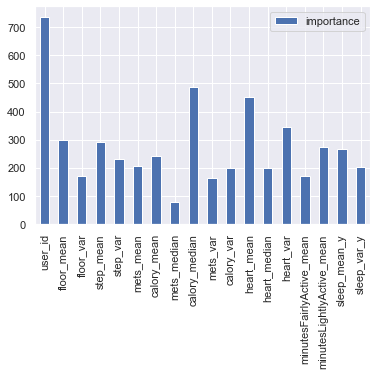

In [74]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

X, y = ques_fitbit[['user_id',
       'floor_mean',  'floor_var', 'step_mean', 
       'step_var', 'mets_mean', 'calory_mean', 'mets_median', 'calory_median',
       'mets_var', 'calory_var', 'heart_mean', 'heart_median', 'heart_var',
       'minutesFairlyActive_mean', 
        'minutesLightlyActive_mean','sleep_mean_y', 
       'sleep_var_y']], ques_fitbit['positive_class']

# 学習データとテストデータを分ける
X_train, X_test, y_train, y_test = train_test_split(X, y)

# データを格納する
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# 学習条件を設定
params = {'task': 'train',
          'boosting_type': 'gbdt',
          'objective': 'multiclass',
          'metric': {'multi_logloss'},
          'num_class': 3,
          'learning_rate': 0.02,
          'num_leaves': 23,
          'min_data_in_leaf': 1,
          'num_iteration': 1000,
          'verbose': 0}

# 学習する
model = lgb.train(params,
                  lgb_train,
                  num_boost_round=50,
                  valid_sets=lgb_eval,
                  early_stopping_rounds=20)

# テストデータで予測する
y_pred = model.predict(X_test, num_iteration=model.best_iteration)
y_pred_max = np.argmax(y_pred, axis=1)

# Accuracy を計算する
accuracy = sum(y_test == y_pred_max) / len(y_test)
print('accuracy:', accuracy)

# importanceを表示する
importance = pd.DataFrame(model.feature_importance(), index=list(X.columns), columns=['importance'])
display(importance)
importance.plot.bar()



# print('f1-score:',f1_score(y_test,y_pred_max))

[Text(0.5, 12.5, 'predict label'), Text(30.5, 0.5, 'true label')]

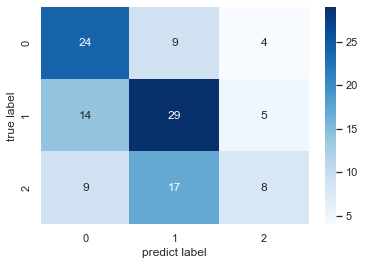

In [76]:
cm = confusion_matrix(y_test, y_pred_max)
sns.heatmap(cm, annot=True, cmap='Blues').set(xlabel="predict label", ylabel="true label")

In [77]:

ques_fitbit.to_csv('./analyse_data/ques_fitbit.csv')

In [78]:

ques_act_day.loc[ques_act_day['positive_score']<=2.666667,'positive_class']=0
ques_act_day.loc[(ques_act_day['positive_score']>2.666667)&(ques_act_day['positive_score']<4.66667),'positive_class']=1
ques_act_day.loc[ques_act_day['positive_score']>=4.66667,'positive_class']=2

ques_act_day.loc[ques_act_day['depressive_score']<=0.333333,'depressive_class']=0
ques_act_day.loc[(ques_act_day['depressive_score']>0.333333)&(ques_act_day['depressive_score']<2.666667),'depressive_class']=1
ques_act_day.loc[ques_act_day['depressive_score']>=2.666667,'depressive_class']=2

ques_act_day.loc[ques_act_day['anxious_score']<=0.666667,'anxious_class']=0
ques_act_day.loc[(ques_act_day['anxious_score']>0.666667)&(ques_act_day['anxious_score']<3.333333),'anxious_class']=1
ques_act_day.loc[ques_act_day['anxious_score']>=3.333333,'anxious_class']=2

In [79]:
ques_act_day_pred =ques_act_day[[  'user_id','meeting_ftof',  'meal', 'working_alone',
       'hobby_break', 'housework_childcare', 'break', 'transfer',
       'web_conference', 'other', 'work_outsideduty', 'facetoface_meeting',
       'collaboration', 'remote_conference',  'positive_class',
       'depressive_class', 'anxious_class']]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001392 seconds.
You can set `force_col_wise=true` to remove the overhead.
[1]	valid_0's multi_logloss: 1.0906
Training until validation scores don't improve for 20 rounds
[2]	valid_0's multi_logloss: 1.08418
[3]	valid_0's multi_logloss: 1.07787
[4]	valid_0's multi_logloss: 1.07191
[5]	valid_0's multi_logloss: 1.06655
[6]	valid_0's multi_logloss: 1.06169
[7]	valid_0's multi_logloss: 1.0568
[8]	valid_0's multi_logloss: 1.05161
[9]	valid_0's multi_logloss: 1.04647
[10]	valid_0's multi_logloss: 1.04179
[11]	valid_0's multi_logloss: 1.03804
[12]	valid_0's multi_logloss: 1.03391
[13]	valid_0's multi_logloss: 1.03111
[14]	valid_0's multi_logloss: 1.02689
[15]	valid_0's multi_logloss: 1.02394
[16]	valid_0's multi_logloss: 1.02117
[17]	valid_0's multi_logloss: 1.01748
[18]	valid_0's multi_logloss: 1.01495
[19]	valid_0's multi_logloss: 1.01143
[20]	valid_0's multi_logloss: 1.00851
[21]	valid_0's multi_logl

,importance
user_id,1404
meal,501
working_alone,692
hobby_break,589
housework_childcare,273
break,360
transfer,383
web_conference,335
other,227
work_outsideduty,14


<AxesSubplot:>

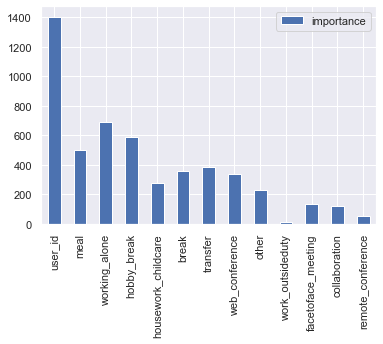

In [80]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
ques_act_day_pred['user_id'] = ques_act_day_pred['user_id'].astype('int')
X, y = ques_act_day_pred[['user_id',
        'meal', 'working_alone',
       'hobby_break', 'housework_childcare', 'break', 'transfer',
       'web_conference', 'other', 'work_outsideduty', 'facetoface_meeting',
       'collaboration', 'remote_conference']], ques_act_day_pred['positive_class']

# 学習データとテストデータを分ける
X_train, X_test, y_train, y_test = train_test_split(X, y)

# データを格納する
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# 学習条件を設定
params = {'task': 'train',
          'boosting_type': 'gbdt',
          'objective': 'multiclass',
          'metric': {'multi_logloss'},
          'num_class': 3,
          'learning_rate': 0.02,
          'num_leaves': 23,
          'min_data_in_leaf': 1,
          'num_iteration': 1000,
          'verbose': 0}

# 学習する
model = lgb.train(params,
                  lgb_train,
                  num_boost_round=50,
                  valid_sets=lgb_eval,
                  early_stopping_rounds=20)

# テストデータで予測する
y_pred = model.predict(X_test, num_iteration=model.best_iteration)
y_pred_max = np.argmax(y_pred, axis=1)

# Accuracy を計算する
accuracy = sum(y_test == y_pred_max) / len(y_test)
print('accuracy:', accuracy)

# importanceを表示する
importance = pd.DataFrame(model.feature_importance(), index=list(X.columns), columns=['importance'])
display(importance)
importance.plot.bar()


In [81]:
# ques_act_day_pred.to_csv('./analyse_data/ques_act_day_pred.csv')

[Text(0.5, 12.5, 'predict label'), Text(30.5, 0.5, 'true label')]

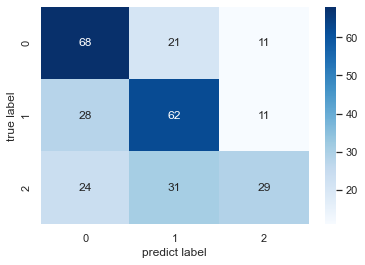

In [82]:
cm = confusion_matrix(y_test, y_pred_max)
sns.heatmap(cm, annot=True, cmap='Blues').set(xlabel="predict label", ylabel="true label")

In [83]:
dams_score['Date_jp'] = pd.to_datetime(dams_score['Date_jp'])
att_weather_dams = pd.merge(dams_score, att_weather,left_on=['user_id','Date_jp'],right_on=['user_id','Date'])

In [84]:
att_weather_dams_pred = att_weather_dams[['user_id','positive_class',
       'depressive_class', 'anxious_class', 'sex', 'age', 'locate_id',
        'ave_temperature', 'max_temperature',
       'mini_temperature', 'sum_rainfall', 'sunlight_time', 'ave_windspeed',
       'max_windspeed', 'ave_vaporpressure', 'ave_cloudcover', 'weather_6to18',
       'weather_18to6']]

In [85]:
att_weather_dams.columns

Index(['user_id', 'value_dams', 'datetime_jp', 'Date_jp', 'positive_score',
       'depressive_score', 'anxious_score', 'Days_plus1', 'positive_class',
       'depressive_class', 'anxious_class', 'sex', 'age', 'locate_id',
       'locate_name', 'Date', 'ave_temperature', 'max_temperature',
       'mini_temperature', 'sum_rainfall', 'sunlight_time', 'ave_windspeed',
       'max_windspeed', 'ave_vaporpressure', 'ave_cloudcover', 'weather_6to18',
       'weather_18to6', 'locate'],
      dtype='object')

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003358 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[1]	valid_0's multi_logloss: 1.09364
Training until validation scores don't improve for 20 rounds
[2]	valid_0's multi_logloss: 1.08737
[3]	valid_0's multi_logloss: 1.08149
[4]	valid_0's multi_logloss: 1.076
[5]	valid_0's multi_logloss: 1.07078
[6]	valid_0's multi_logloss: 1.06617
[7]	valid_0's multi_logloss: 1.06174
[8]	valid_0's multi_logloss: 1.05713
[9]	valid_0's multi_logloss: 1.05266
[10]	valid_0's multi_logloss: 1.04917
[11]	valid_0's multi_logloss: 1.04493
[12]	valid_0's multi_logloss: 1.04082
[13]	valid_0's multi_logloss: 1.03704
[14]	valid_0's multi_logloss: 1.03351
[15]	valid_0's multi_logloss: 1.03025
[16]	valid_0's multi_logloss: 1.02713
[17]	valid_0's multi_logloss: 1.02388
[18]	valid_0's multi_logloss: 1.02124
[19]	valid_0's multi_logloss: 1.01835

,importance
user_id,2311
sex,211
age,1183
ave_temperature,616
max_temperature,412
mini_temperature,648
sum_rainfall,206
sunlight_time,414
ave_windspeed,356
max_windspeed,546


<AxesSubplot:>

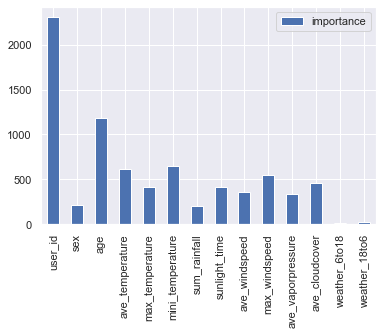

In [86]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
att_weather_dams_pred[['user_id','sex', 'age', 'weather_6to18',
       'weather_18to6']]=att_weather_dams_pred[['user_id','sex', 'age', 'weather_6to18',
       'weather_18to6']].astype('int')
X, y = att_weather_dams_pred[['user_id', 'sex', 'age', 
        'ave_temperature', 'max_temperature',
       'mini_temperature', 'sum_rainfall', 'sunlight_time', 'ave_windspeed',
       'max_windspeed', 'ave_vaporpressure', 'ave_cloudcover', 'weather_6to18',
       'weather_18to6']], att_weather_dams_pred['positive_class']

# 学習データとテストデータを分ける
X_train, X_test, y_train, y_test = train_test_split(X, y)

# データを格納する
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# 学習条件を設定
params = {'task': 'train',
          'boosting_type': 'gbdt',
          'objective': 'multiclass',
          'metric': {'multi_logloss'},
          'num_class': 3,
          'learning_rate': 0.02,
          'num_leaves': 23,
          'min_data_in_leaf': 1,
          'num_iteration': 1000,
          'verbose': 0}

# 学習する
model = lgb.train(params,
                  lgb_train,
                  num_boost_round=50,
                  valid_sets=lgb_eval,
                  early_stopping_rounds=20,
#                   categorical_feature = att_weather_dams_pred[[ 'sex', 'age', 'weather_6to18','weather_18to6']]
                 )

# テストデータで予測する
y_pred = model.predict(X_test, num_iteration=model.best_iteration)
y_pred_max = np.argmax(y_pred, axis=1)

# Accuracy を計算する
accuracy = sum(y_test == y_pred_max) / len(y_test)
print('accuracy:', accuracy)

# importanceを表示する
importance = pd.DataFrame(model.feature_importance(), index=list(X.columns), columns=['importance'])
display(importance)
importance.plot.bar()

[Text(0.5, 12.5, 'predict label'), Text(30.5, 0.5, 'true label')]

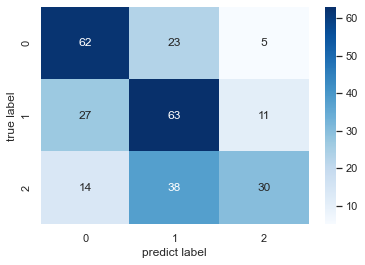

In [87]:
cm = confusion_matrix(y_test, y_pred_max)
sns.heatmap(cm, annot=True, cmap='Blues').set(xlabel="predict label", ylabel="true label")

In [395]:
# att_weather_dams_pred.to_csv('./analyse_data/att_weather_dams_pred.csv')

In [ ]:
'positive_score_label_m', 'depressive_score_label_m',
       'anxious_score_label_m', 'value_nemuke', 'value_hukai', 'value_boyake',
       'value_nemuke_label_m', 'value_hukai_label_m', 'value_boyake_label_m',
       'merge_date', 'positive_score_label_y',
       'depressive_score_label_y', 'anxious_score_label_y',
       'value_hukai_label_y', 'value_boyake_label_y', 'value_nemuke_label_y',
        'value_eval_label', 'hour', 'kouritu_label', 'syutyu_label',
       'yoteidori_label', 'jubun_comu_label', 'kouritu_comu_label',
       'idea_label', 'seika_label', 'study_new_label',
       'decide_doing_label', 'paformance_label', 'absent_by_problem_label',
        'value_recover_label',
       'workenga_score_label']

In [22]:
import pandas as pd
all_data = pd.read_csv('./all_data.csv')
night_w_recover = pd.read_csv('./analyse_data/questionaire_data/night_w_recover.csv')
night_w_workenga = pd.read_csv('./analyse_data/questionaire_data/night_w_workenga.csv')
night_w_productivity = pd.read_csv('./analyse_data/questionaire_data/night_w_productivity.csv')


In [23]:
night_w_recover = night_w_recover[[ 'user_id', 'value_recover', 'forget_work', 'relax',
       'date']]

In [24]:
recover_cont = night_w_productivity[[ 'user_id','date', 'decide_doing','study_new']]
night_w_recover = pd.merge(night_w_recover, recover_cont,on=['user_id','date'])

In [28]:
night_w_recover['value_recover'] = (night_w_recover['forget_work']+
                                   night_w_recover['relax']+
                                   night_w_recover['decide_doing']+
                                   night_w_recover['study_new'])/4

In [29]:
night_w_recover['value_recover']

0       3.25
1       3.00
2       3.25
3       2.50
4       2.00
        ... 
1044    3.25
1045    2.50
1046    4.25
1047    2.00
1048    2.50
Name: value_recover, Length: 1049, dtype: float64

In [30]:
#目的変数のラベルづけ
#下位40%と上位40％の二値分類をする
def labeling(df, colmn):
    under_40 = df[colmn].quantile(0.4)
    upper_60 = df[colmn].quantile(0.6)
    df.loc[df[colmn]<=under_40,colmn + '_label']=0
    df.loc[df[colmn]>=upper_60,colmn + '_label']=2
    df.loc[(df[colmn]<upper_60)&(df[colmn]>under_40),colmn + '_label']=1
    df = df.dropna(subset=[colmn])
    return df

In [33]:
labeling(night_w_recover, 'value_recover')
recover_label = night_w_recover[['date','user_id','value_recover_label']]

In [40]:
all_data=all_data.drop(columns=['decide_doing_label','study_new_label'])

In [41]:
all_data = pd.merge(all_data, recover_label, on=['user_id','date'])

/Users/yusuke-n/Library/Python/3.8/lib/python/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003246 seconds.
You can set `force_col_wise=true` to remove the overhead.
[1]	valid_0's binary_error: 0.418605
Training until validation scores don't improve for 20 rounds
[2]	valid_0's binary_error: 0.418605
[3]	valid_0's binary_error: 0.418605
[4]	valid_0's binary_error: 0.418605
[5]	valid_0's binary_error: 0.418605
[6]	valid_0's binary_error: 0.418605
[7]	valid_0's binary_error: 0.418605
[8]	valid_0's binary_error: 0.418605
[9]	valid_0's binary_error: 0.372093
[10]	valid_0's binary_error: 0.325581
[11]	valid_0's binary_error: 0.27907
[12]	valid_0's binary_error: 0.27907
[13]	valid_0's binary_error: 0.27907
[14]	valid_0's binary_error: 0.209302
[15]	valid_0's binary_error: 0.209302
[16]	valid_0's binary_error: 0.209302
[17]	valid_0's binary_error: 0.209302
[18]	valid_0's binary_error: 0.209302
[19]	valid_0's binary_error: 0.209302
[20]	valid_0's binary_error: 0.209302
[21]	valid_0's binary_erro

/Users/yusuke-n/Library/Python/3.8/lib/python/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[5]	valid_0's binary_error: 0.418605
[6]	valid_0's binary_error: 0.418605
[7]	valid_0's binary_error: 0.418605
[8]	valid_0's binary_error: 0.418605
[9]	valid_0's binary_error: 0.418605
[10]	valid_0's binary_error: 0.418605
[11]	valid_0's binary_error: 0.27907
[12]	valid_0's binary_error: 0.186047
[13]	valid_0's binary_error: 0.186047
[14]	valid_0's binary_error: 0.186047
[15]	valid_0's binary_error: 0.186047
[16]	valid_0's binary_error: 0.186047
[17]	valid_0's binary_error: 0.186047
[18]	valid_0's binary_error: 0.186047
[19]	valid_0's binary_error: 0.209302
[20]	valid_0's binary_error: 0.209302
[21]	valid_0's binary_error: 0.209302
[22]	valid_0's binary_error: 0.209302
[23]	valid_0's binary_error: 0.209302
[24]	valid_0's binary_error: 0.209302
[25]	valid_0's binary_error: 0.209302
[26]	valid_0's binary_error: 0.209302
[27]	valid_0's binary_error: 0.209302
[28]	valid_0's binary_error: 0.209302
[29]	valid_0's binary_error: 0.209302
[30]	valid_0's binary_error: 0.209302
[31]	valid_0's bin

/Users/yusuke-n/Library/Python/3.8/lib/python/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[6]	valid_0's binary_error: 0.418605
[7]	valid_0's binary_error: 0.418605
[8]	valid_0's binary_error: 0.418605
[9]	valid_0's binary_error: 0.418605
[10]	valid_0's binary_error: 0.116279
[11]	valid_0's binary_error: 0.116279
[12]	valid_0's binary_error: 0.0930233
[13]	valid_0's binary_error: 0.0697674
[14]	valid_0's binary_error: 0.0930233
[15]	valid_0's binary_error: 0.0930233
[16]	valid_0's binary_error: 0.0930233
[17]	valid_0's binary_error: 0.0930233
[18]	valid_0's binary_error: 0.0930233
[19]	valid_0's binary_error: 0.0930233
[20]	valid_0's binary_error: 0.0930233
[21]	valid_0's binary_error: 0.0930233
[22]	valid_0's binary_error: 0.0697674
[23]	valid_0's binary_error: 0.0930233
[24]	valid_0's binary_error: 0.0697674
[25]	valid_0's binary_error: 0.0697674
[26]	valid_0's binary_error: 0.0697674
[27]	valid_0's binary_error: 0.0697674
[28]	valid_0's binary_error: 0.0697674
[29]	valid_0's binary_error: 0.0697674
[30]	valid_0's binary_error: 0.0697674
[31]	valid_0's binary_error: 0.0697

/Users/yusuke-n/Library/Python/3.8/lib/python/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001296 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[1]	valid_0's binary_error: 0.418605
Training until validation scores don't improve for 20 rounds
[2]	valid_0's binary_error: 0.418605
[3]	valid_0's binary_error: 0.418605
[4]	valid_0's binary_error: 0.418605
[5]	valid_0's binary_error: 0.418605
[6]	valid_0's binary_error: 0.418605
[7]	valid_0's binary_error: 0.418605
[8]	valid_0's binary_error: 0.418605
[9]	valid_0's binary_error: 0.162791
[10]	valid_0's binary_error: 0.162791
[11]	valid_0's binary_error: 0.139535
[12]	valid_0's binary_error: 0.139535
[13]	valid_0's binary_error: 0.139535
[14]	valid_0's binary_error: 0.139535
[15]	valid_0's binary_error: 0.116279
[16]	valid_0's binary_error: 0.116279
[17]	valid_0's binary_error: 0.116279
[18]	valid_0's binary_error: 0.139535
[19]	valid_0's binary_error: 0.1627

/Users/yusuke-n/Library/Python/3.8/lib/python/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's binary_error: 0.428571
Training until validation scores don't improve for 20 rounds
[2]	valid_0's binary_error: 0.428571
[3]	valid_0's binary_error: 0.428571
[4]	valid_0's binary_error: 0.428571
[5]	valid_0's binary_error: 0.428571
[6]	valid_0's binary_error: 0.428571
[7]	valid_0's binary_error: 0.428571
[8]	valid_0's binary_error: 0.428571
[9]	valid_0's binary_error: 0.190476
[10]	valid_0's binary_error: 0.190476
[11]	valid_0's binary_error: 0.190476
[12]	valid_0's binary_error: 0.190476
[13]	valid_0's binary_error: 0.190476
[14]	valid_0's binary_error: 0.190476
[15]	valid_0's binary_error: 0.190476
[16]	valid_0's binary_error: 0.166667
[17]	valid_0's binary_error: 0.142857
[18]	valid_0's binary_error: 0.166667
[19]	valid_0's binary_error: 0.166667
[20]	valid_0's binary_error: 0.142857
[21]	valid_0's binary_error: 0.142857
[22]	valid_0's binary_error: 0.119048
[23]	valid_0's binary_error: 0.142857
[24]	valid_0's binary_error: 0.119048
[25]	valid_0's binary_error: 0.11904

,importance_positive_score_label_m
作業者/参加者,1405.998990
快適,1114.044295
他者あり（同僚など）,836.102247
比較的新規性が高く，試行錯誤を伴う定型化できていない業務,445.668675
家（その他）,399.167286
どちらでもない,383.273361
家（リビングなど）,362.104051
比較的慣れており，定型化できている業務,289.335481
不快,259.495997
職場,205.954163


<AxesSubplot:>

/Users/yusuke-n/Library/Python/3.8/lib/python/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 31649 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yusuke-n/Library/Python/3.8/lib/python/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 29702 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yusuke-n/Library/Python/3.8/lib/python/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 32773 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yusuke-n/Library/Python/3.8/lib/python/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20860 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yusuke-n/Library/Python/3.8/lib/python/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20316 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yusuke-n/Library/Python/3.8/lib/p

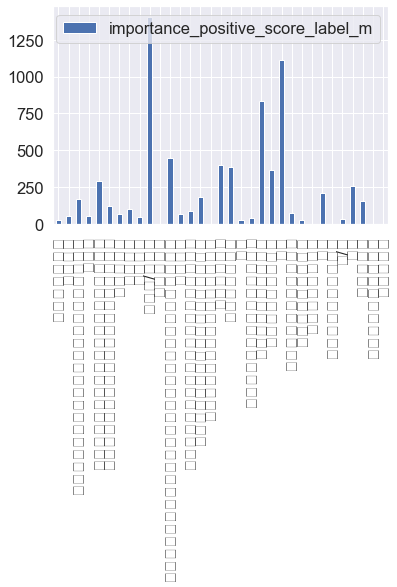

In [198]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn import datasets
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score # モデル評価用(正答率)
from sklearn.metrics import log_loss # モデル評価用(logloss)     
from sklearn.metrics import roc_auc_score # モデル評価用(auc)
import japanize_matplotlib
# ques_act_day_pred['user_id'] = ques_act_day_pred['user_id'].astype('int')
target = 'positive_score_label_m'

all_data_pre=all_data[all_data[target]!=1].dropna(subset=[target])
X = all_data_pre[[
        '管理者兼作業者', '企画業務', 'ノンコア業務（自身が本来担当ではない業務）', '管理者',
       '比較的慣れており，定型化できている業務', 'コア業務（自身が本来担当している業務）', '共同作業者', '開発業務', '管理業務',
       '作業者/参加者', '管理の業務', '比較的新規性が高く，試行錯誤を伴う定型化できていない業務', '営業業務',
       '事務業務（サポート業務、経理業務など）', '現場業務（主に肉体労働を伴うもの）', '現場（主に肉体労働を伴うもの）', '家（その他）',
       'どちらでもない', '一人', '家（書斎など執務向けの場所）', '他者あり（同僚など）', '家（リビングなど）', '快適',
       '職場外のワークスペース', '他者あり（無干渉）', '他者あり（同僚）', '職場', '他者あり（家族など）', '店/外', '不快',
       '非常に快適', '職場外ワークスペース', '非常に不快',
                 
#         '対面会議', '食事', '単独作業', '趣味・休憩', '家事・育児', '休憩（業務時間内）',
#        '移動', 'web会議', 'その他', '業務外作業', '共同作業（コミュニケーションを伴う）', '電話（会議）',
    ]]
y = all_data_pre[target].replace(2,1).astype('int')

 # kfoldの分割数
k = 5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=0)
# 学習条件を設定
params = {'task': 'train',
              'boosting_type': 'gbdt',
              'objective': 'binary',
              'metric': {'binary_error'},
              'num_class': 1,
              'learning_rate': 0.02,
              'num_leaves': 23,
              'min_data_in_leaf': 1,
              'num_iteration': 1000,
              'verbose': 0,
              'reg_alpha':0.93,
              'reg_lambda':2.3
              }
    
acc_list = []
f1_list = []
auc_list = []
    
for train_index, test_index in skf.split(X, y):
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index]
        
    # ここではvalidをモデル評価、evalをフォールドアウト検証に使う・・・分割の大きさはデータセットと相談する
    X_eval, X_valid, y_eval, y_valid = train_test_split(X_test, y_test, random_state=90, 
                                                            shuffle=True, stratify=y_test, test_size=0.3)
    # データセットを生成する
    lgb_train = lgb.Dataset(X_train, y_train)

    # モデル評価用
    lgb_valid = lgb.Dataset(X_valid, y_valid, reference=lgb_train)
    # 学習する
    model = lgb.train(params,
                          lgb_train,
                          num_boost_round=50,
                          valid_sets=lgb_valid,
                          early_stopping_rounds=20)
        
    y_pred_prob = model.predict(X_test, num_iteration=model.best_iteration)
    y_pred = [0 if i < 0.5 else 1 for i in y_pred_prob]
        
    # acc : 正答率
    acc = accuracy_score(y_test,y_pred)
    print('Acc :', acc)
    # f1-score
    f1 = f1_score(y_test,y_pred)
    print('f1-score :', f1)
    # logloss 
    logloss =  log_loss(y_test,y_pred_prob) # 引数 : log_loss(正解クラス,[クラス0の予測確率,クラス1の予測確率])
    print('logloss :', logloss)
    # AUC 
    auc = roc_auc_score(y_test,y_pred_prob) # 引数 : roc_auc_score(正解クラス, クラス1の予測確率)
    print('AUC :', auc) 
        
    acc_list.append(acc)
    f1_list.append(f1)
    auc_list.append(auc)
        
print('Kfold平均 acc:{}, f1-score:{}, auc:{}'.format(np.mean(acc_list), 
                                                         np.mean(f1_list), 
                                                         np.mean(auc_list)))
column = 'importance_'+ target
# importanceを表示する
importance = pd.DataFrame(model.feature_importance(importance_type='gain'), index=list(X.columns), columns=[column])
display(importance.sort_values(column, ascending=False))
good_columns=importance.sort_values(column, ascending=False).index[0:30]
importance.plot.bar()

In [91]:
# all_importance = pd.merge(all_importance, importance,left_index=True, right_index=True)
all_importance_detail = all_importance[['importance_positive_score_label_m_x',
       'importance_depressive_score_label_m',
       'importance_anxious_score_label_m', 'importance_positive_score_label_y',
       'importance_depressive_score_label_y',
       'importance_anxious_score_label_y']].rename(columns={'importance_positive_score_label_m_x':'importance_positive_score_label_morning'
                                                           ,'importance_depressive_score_label_m':'importance_depressive_score_label_morning'
                                                           ,'importance_anxious_score_label_m':'importance_anxious_score_label_morning'
                                                           ,'importance_positive_score_label_y':'importance_positive_score_label_night'
                                                           ,'importance_depressive_score_label_y':'importance_depressive_score_label_night'
                                                           ,'importance_anxious_score_label_y':'importance_anxious_score_label_night'})
# all_importance = pd.merge(all_importance, importance,left_index=True, right_index=True)
# all_importance

/Users/yusuke-n/Library/Python/3.8/lib/python/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/yusuke-n/Library/Python/3.8/lib/python/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000835 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[1]	valid_0's binary_error: 0.223881
Training until validation scores don't improve for 20 rounds
[2]	valid_0's binary_error: 0.208955
[3]	valid_0's binary_error: 0.19403
[4]	valid_0's binary_error: 0.208955
[5]	valid_0's binary_error: 0.19403
[6]	valid_0's binary_error: 0.208955
[7]	valid_0's binary_error: 0.208955
[8]	valid_0's binary_error: 0.19403
[9]	valid_0's binary_error: 0.19403
[10]	valid_0's binary_error: 0.208955
[11]	valid_0's binary_error: 0.208955
[12]	valid_0's binary_error: 0.208955
[13]	valid_0's binary_error: 0.208955
[14]	valid_0's binary_error: 0.208955
[15]	valid_0's binary_error: 0.208955
[16]	valid_0's binary_error: 0.208955
[17]	valid_0's binary_error: 0.208955
[18]	valid_0's binary_error: 0.208955
[19]	valid_0's binary_error: 0.208955
[

/Users/yusuke-n/Library/Python/3.8/lib/python/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's binary_error: 0.253731
Training until validation scores don't improve for 20 rounds
[2]	valid_0's binary_error: 0.268657
[3]	valid_0's binary_error: 0.268657
[4]	valid_0's binary_error: 0.268657
[5]	valid_0's binary_error: 0.268657
[6]	valid_0's binary_error: 0.268657
[7]	valid_0's binary_error: 0.268657
[8]	valid_0's binary_error: 0.253731
[9]	valid_0's binary_error: 0.253731
[10]	valid_0's binary_error: 0.238806
[11]	valid_0's binary_error: 0.238806
[12]	valid_0's binary_error: 0.238806
[13]	valid_0's binary_error: 0.238806
[14]	valid_0's binary_error: 0.238806
[15]	valid_0's binary_error: 0.253731
[16]	valid_0's binary_error: 0.253731
[17]	valid_0's binary_error: 0.238806
[18]	valid_0's binary_error: 0.238806
[19]	valid_0's binary_error: 0.253731
[20]	valid_0's binary_error: 0.238806
[21]	valid_0's binary_error: 0.223881
[22]	valid_0's binary_error: 0.238806
[23]	valid_0's binary_error: 0.238806
[24]	valid_0's binary_error: 0.223881
[25]	valid_0's binary_error: 0.22388

/Users/yusuke-n/Library/Python/3.8/lib/python/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[28]	valid_0's binary_error: 0.298507
[29]	valid_0's binary_error: 0.283582
[30]	valid_0's binary_error: 0.298507
[31]	valid_0's binary_error: 0.298507
[32]	valid_0's binary_error: 0.298507
[33]	valid_0's binary_error: 0.313433
[34]	valid_0's binary_error: 0.298507
[35]	valid_0's binary_error: 0.298507
Early stopping, best iteration is:
[15]	valid_0's binary_error: 0.238806
Acc : 0.7757847533632287
f1-score : 0.7619047619047619
logloss : 0.6126925027146178
AUC : 0.8605212355212355
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000556 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[1]	valid_0's binary_error: 0.313433
Training until validation scores don't improve for 20 rounds
[2]	valid_0's binary_error: 0.253731
[3]	valid_0's binary_error: 0.268657
[4]	valid_0's binary_error: 0.268657
[5]	valid_0's binary_error: 0.268657
[6]	valid_0's binary_error: 0.238806
[7

/Users/yusuke-n/Library/Python/3.8/lib/python/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[13]	valid_0's binary_error: 0.223881
[14]	valid_0's binary_error: 0.223881
[15]	valid_0's binary_error: 0.223881
[16]	valid_0's binary_error: 0.223881
[17]	valid_0's binary_error: 0.208955
[18]	valid_0's binary_error: 0.208955
[19]	valid_0's binary_error: 0.223881
[20]	valid_0's binary_error: 0.223881
[21]	valid_0's binary_error: 0.223881
[22]	valid_0's binary_error: 0.268657
[23]	valid_0's binary_error: 0.238806
[24]	valid_0's binary_error: 0.238806
[25]	valid_0's binary_error: 0.238806
[26]	valid_0's binary_error: 0.238806
[27]	valid_0's binary_error: 0.238806
[28]	valid_0's binary_error: 0.238806
[29]	valid_0's binary_error: 0.223881
[30]	valid_0's binary_error: 0.223881
[31]	valid_0's binary_error: 0.238806
[32]	valid_0's binary_error: 0.223881
[33]	valid_0's binary_error: 0.238806
[34]	valid_0's binary_error: 0.238806
[35]	valid_0's binary_error: 0.238806
[36]	valid_0's binary_error: 0.238806
[37]	valid_0's binary_error: 0.238806
Early stopping, best iteration is:
[17]	valid_0's 

,importance
趣味・休憩,810.270246
快適,652.338824
比較的慣れており，定型化できている業務,403.094383
家（書斎など執務向けの場所）,356.608396
一人,288.494651
単独作業,260.318328
age,209.851480
休憩（業務時間内）,207.207670
sex,175.359921
web会議,161.813530


<AxesSubplot:>

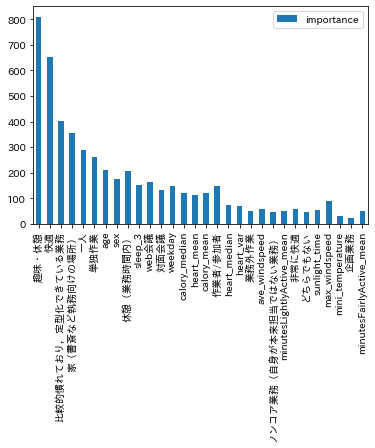

In [55]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score # モデル評価用(正答率)
from sklearn.metrics import log_loss # モデル評価用(logloss)     
from sklearn.metrics import roc_auc_score # モデル評価用(auc)
import japanize_matplotlib
# ques_act_day_pred['user_id'] = ques_act_day_pred['user_id'].astype('int')
target='value_recover_label_y'
all_data_pre=all_data[all_data[target]!=1].dropna(subset=[target])
X = all_data_pre[good_columns]
y = all_data_pre[target].replace(2,1).astype('int')

 # kfoldの分割数
k = 5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=0)
# 学習条件を設定
params = {'task': 'train',
              'boosting_type': 'gbdt',
              'objective': 'binary',
              'metric': {'binary_error'},
              'num_class': 1,
              'learning_rate': 0.02,
              'num_leaves': 23,
              'min_data_in_leaf': 1,
              'num_iteration': 1000,
              'verbose': 0,
              'reg_alpha':0.93,
              'reg_lambda':2.3
              }
    
acc_list = []
f1_list = []
auc_list = []
    
for train_index, test_index in skf.split(X, y):
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index]
        
    # ここではvalidをモデル評価、evalをフォールドアウト検証に使う・・・分割の大きさはデータセットと相談する
    X_eval, X_valid, y_eval, y_valid = train_test_split(X_test, y_test, random_state=90, 
                                                            shuffle=True, stratify=y_test, test_size=0.3)
    # データセットを生成する
    lgb_train = lgb.Dataset(X_train, y_train)

    # モデル評価用
    lgb_valid = lgb.Dataset(X_valid, y_valid, reference=lgb_train)
    # 学習する
    model = lgb.train(params,
                          lgb_train,
                          num_boost_round=50,
                          valid_sets=lgb_valid,
                          early_stopping_rounds=20)
        
    y_pred_prob = model.predict(X_test, num_iteration=model.best_iteration)
    y_pred = [0 if i < 0.5 else 1 for i in y_pred_prob]
        
    # acc : 正答率
    acc = accuracy_score(y_test,y_pred)
    print('Acc :', acc)
    # f1-score
    f1 = f1_score(y_test,y_pred)
    print('f1-score :', f1)
    # logloss 
    logloss =  log_loss(y_test,y_pred_prob) # 引数 : log_loss(正解クラス,[クラス0の予測確率,クラス1の予測確率])
    print('logloss :', logloss)
    # AUC 
    auc = roc_auc_score(y_test,y_pred_prob) # 引数 : roc_auc_score(正解クラス, クラス1の予測確率)
    print('AUC :', auc) 
        
    acc_list.append(acc)
    f1_list.append(f1)
    auc_list.append(auc)
        
print('Kfold平均 acc:{}, f1-score:{}, auc:{}'.format(np.mean(acc_list), 
                                                         np.mean(f1_list), 
                                                         np.mean(auc_list)))

# importanceを表示する
importance = pd.DataFrame(model.feature_importance(importance_type='gain'), index=list(X.columns), columns=['importance'])
display(importance.sort_values('importance', ascending=False))
good_columns=importance.sort_values('importance', ascending=False).index[0:30]
importance.plot.bar()

In [93]:
# all_importance_kind.to_csv('kind_dams_importance.csv')
# all_importance_detail.to_csv('detail_dams_importance.csv')

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import japanize_matplotlib

<Figure size 432x288 with 0 Axes>

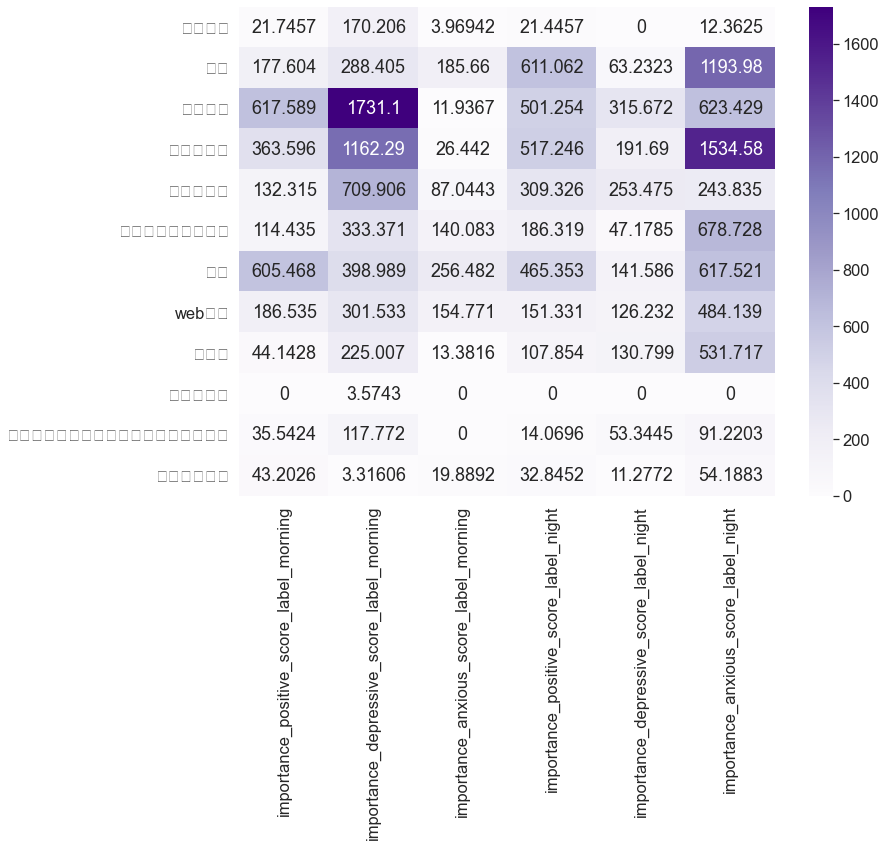

In [117]:
plt.clf()
plt.figure(figsize=(12, 9))
sns.heatmap(all_importance_kind, annot=True, fmt='g', cmap='Purples')
plt.show()

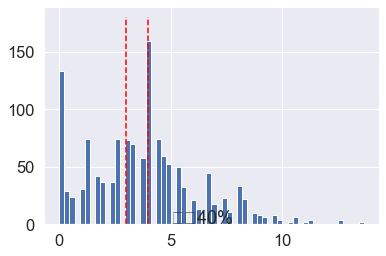

In [153]:
from matplotlib import pyplot

x = 5.0
y = 0.6
s = "上位40%"

pyplot.text(x, y, s)

morning_dams = pd.read_csv('./analyse_data/questionaire_data/morning_dams.csv')
plt.hist(morning_dams['positive_score'],bins=60)
# 縦線
# plt.vlines([morning_dams.describe()["positive_score"]["mean"]], 0, 180, "blue", linestyles='dashed')
plt.vlines(morning_dams["positive_score"].quantile(0.4), 0, 180, "red", linestyles='dashed')
plt.vlines(morning_dams["positive_score"].quantile(0.6), 0, 180, "red", linestyles='dashed')
# morning_dams['positive_score']

In [159]:

all_data[all_data[['管理者兼作業者', '企画業務',
       'ノンコア業務（自身が本来担当ではない業務）', '管理者', '比較的慣れており，定型化できている業務',
       'コア業務（自身が本来担当している業務）', '共同作業者', '開発業務', '管理業務', '作業者/参加者', '管理の業務',
       '比較的新規性が高く，試行錯誤を伴う定型化できていない業務', '営業業務', '事務業務（サポート業務、経理業務など）',
       '現場業務（主に肉体労働を伴うもの）', '現場（主に肉体労働を伴うもの）', '家（その他）', 'どちらでもない', '一人',
       '家（書斎など執務向けの場所）', '他者あり（同僚など）', '家（リビングなど）', '快適', '職場外のワークスペース',
       '他者あり（無干渉）', '他者あり（同僚）', '職場', '他者あり（家族など）', '店/外', '不快', '非常に快適',
       '職場外ワークスペース', '非常に不快']]!=0].count()

Unnamed: 0           0
user_id              0
date                 0
対面会議                 0
食事                   0
                    ..
max_windspeed        0
ave_vaporpressure    0
ave_cloudcover       0
sex                  0
age                  0
Length: 122, dtype: int64

In [183]:
all_data['食事'].query('(all_data.isnotnull()) & (all_data != 0)')

AttributeError: 'Series' object has no attribute 'query'